In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

%matplotlib inline

# Part 1: Data Understanding

In [2]:
price = pd.read_csv('house_price.csv')
print('Size of house_price dataset: ',price.shape)
price.head(5)

Size of house_price dataset:  (2016, 5)


,beds,baths,size,lot_size,price
0,3,2.5,2590,6000.00,795000
1,4,2.0,2240,0.31,915000
2,4,3.0,2040,3783.00,950000
3,4,3.0,3800,5175.00,1950000
4,2,2.0,1042,NaN,950000


In [3]:
data_types = price.dtypes

print("Data Types and Additional Information:")
for column in price.columns:
  print(f'Column: {column}')
  print(f' - Data Type: {data_types[column]}')
  print(f' - Number of Unique Values: {price[column].nunique()}')
  print(f' - Sample Values: {price[column].dropna().unique()[:5]}')

Data Types and Additional Information:
Column: beds
 - Data Type: int64
 - Number of Unique Values: 11
 - Sample Values: [3 4 2 1 5]
Column: baths
 - Data Type: float64
 - Number of Unique Values: 16
 - Sample Values: [2.5 2.  3.  1.  3.5]
Column: size
 - Data Type: int64
 - Number of Unique Values: 879
 - Sample Values: [2590 2240 2040 3800 1042]
Column: lot_size
 - Data Type: float64
 - Number of Unique Values: 959
 - Sample Values: [6.000e+03 3.100e-01 3.783e+03 5.175e+03 1.000e+00]
Column: price
 - Data Type: int64
 - Number of Unique Values: 767
 - Sample Values: [ 795000  915000  950000 1950000  740000]


In [4]:
price.describe()

,beds,baths,size,lot_size,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,2.500000e+07


In [5]:
correlation_matrix = price.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              beds     baths      size  lot_size     price
beds      1.000000  0.652853  0.771929  0.291257  0.293516
baths     0.652853  1.000000  0.667655  0.016913  0.317325
size      0.771929  0.667655  1.000000  0.272596  0.444140
lot_size  0.291257  0.016913  0.272596  1.000000  0.091780
price     0.293516  0.317325  0.444140  0.091780  1.000000


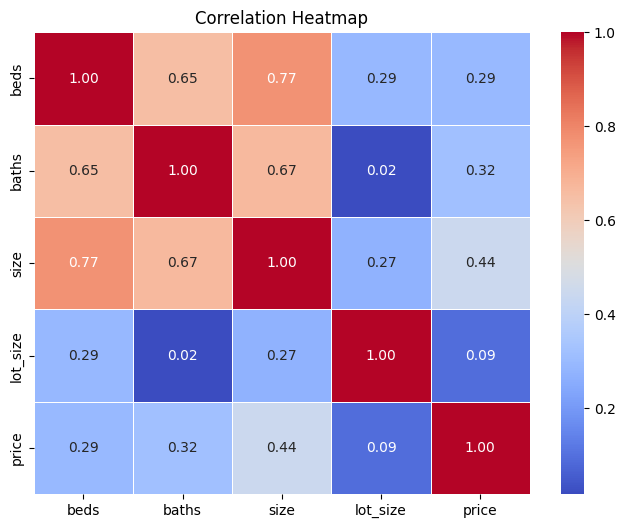

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

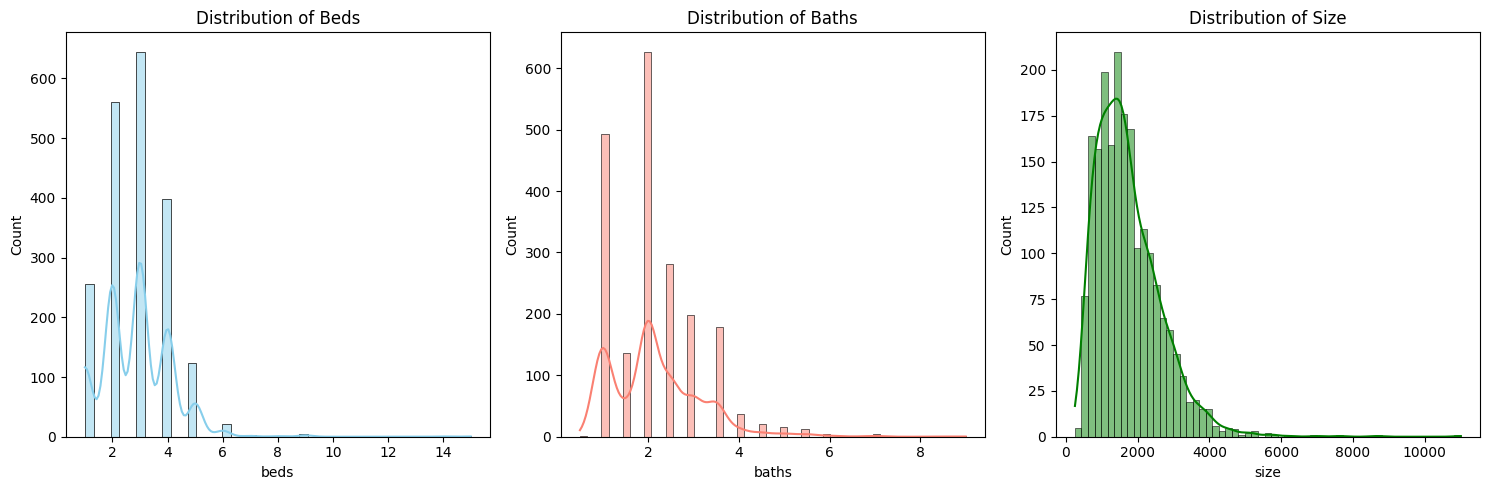

In [7]:
# Visualize the distribution of variables using histograms
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(price['beds'], kde=True, color='skyblue')
plt.title('Distribution of Beds')

plt.subplot(1, 3, 2)
sns.histplot(price['baths'], kde=True, color='salmon')
plt.title('Distribution of Baths')

plt.subplot(1, 3, 3)
sns.histplot(price['size'], kde=True, color='green')
plt.title('Distribution of Size')

plt.tight_layout()
plt.show()

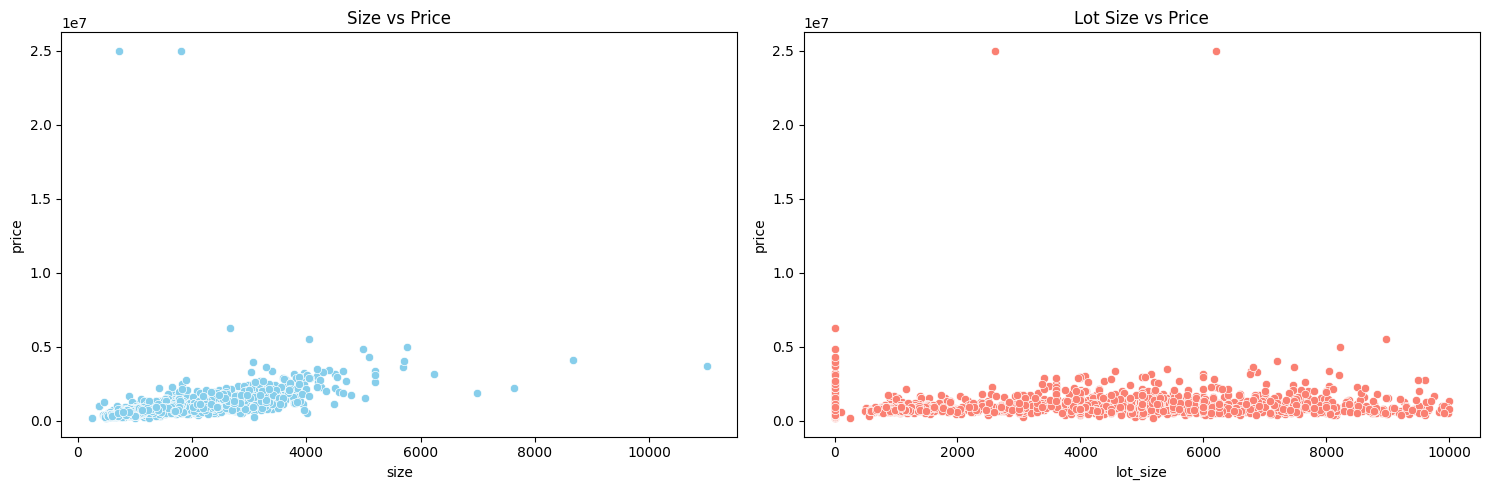

<ipython-input-8-23d8a32f5a27>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='beds', y='price', data=price, palette='pastel')


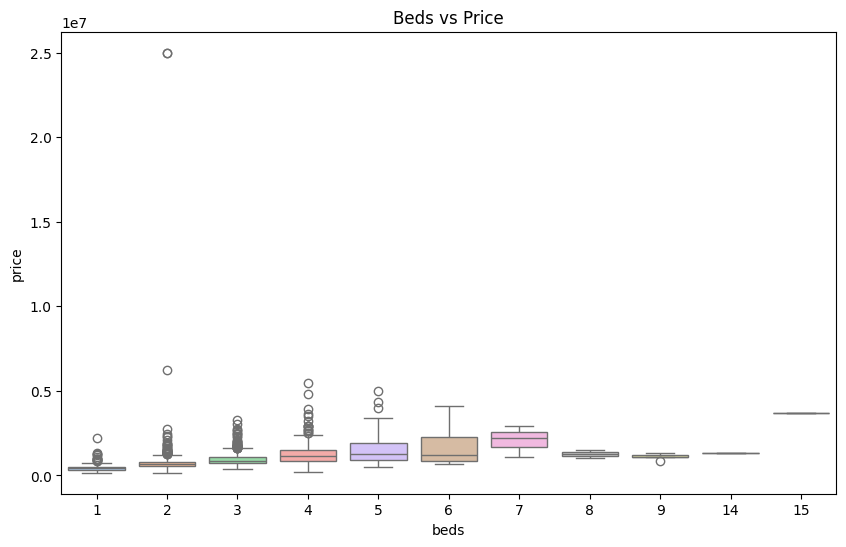

<ipython-input-8-23d8a32f5a27>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='baths', y='price', data=price, palette='pastel')


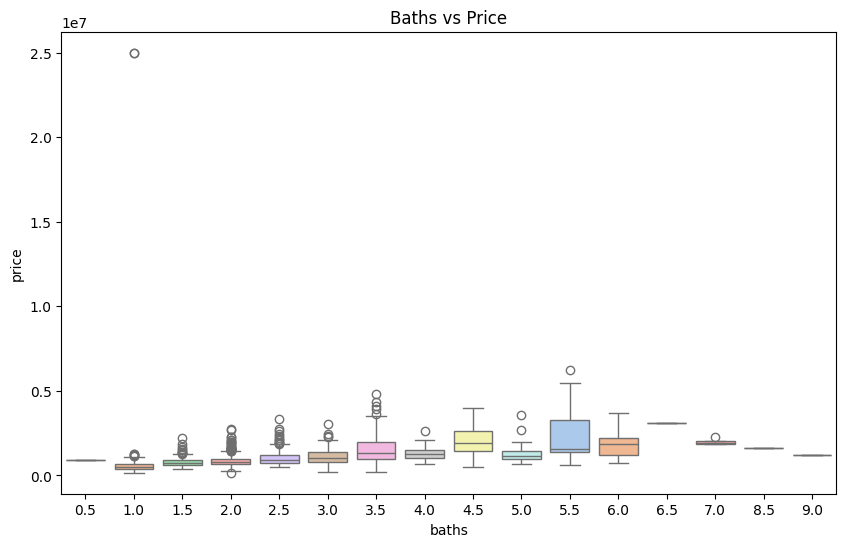

In [8]:
# Visualize the relationship between variables and price using scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='size', y='price', data=price, color='skyblue')
plt.title('Size vs Price')

plt.subplot(1, 2, 2)
sns.scatterplot(x='lot_size', y='price', data=price, color='salmon')
plt.title('Lot Size vs Price')

plt.tight_layout()
plt.show()

# Visualize the relationship between categorical variable (beds) and price using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='beds', y='price', data=price, palette='pastel')
plt.title('Beds vs Price')
plt.show()

# Visualize the relationship between categorical variable (baths) and price using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='baths', y='price', data=price, palette='pastel')
plt.title('Baths vs Price')
plt.show()

# Part 2: Data Preprocessing

## Cleaning

Missing values:
 beds          0
baths         0
size          0
lot_size    347
price         0
dtype: int64


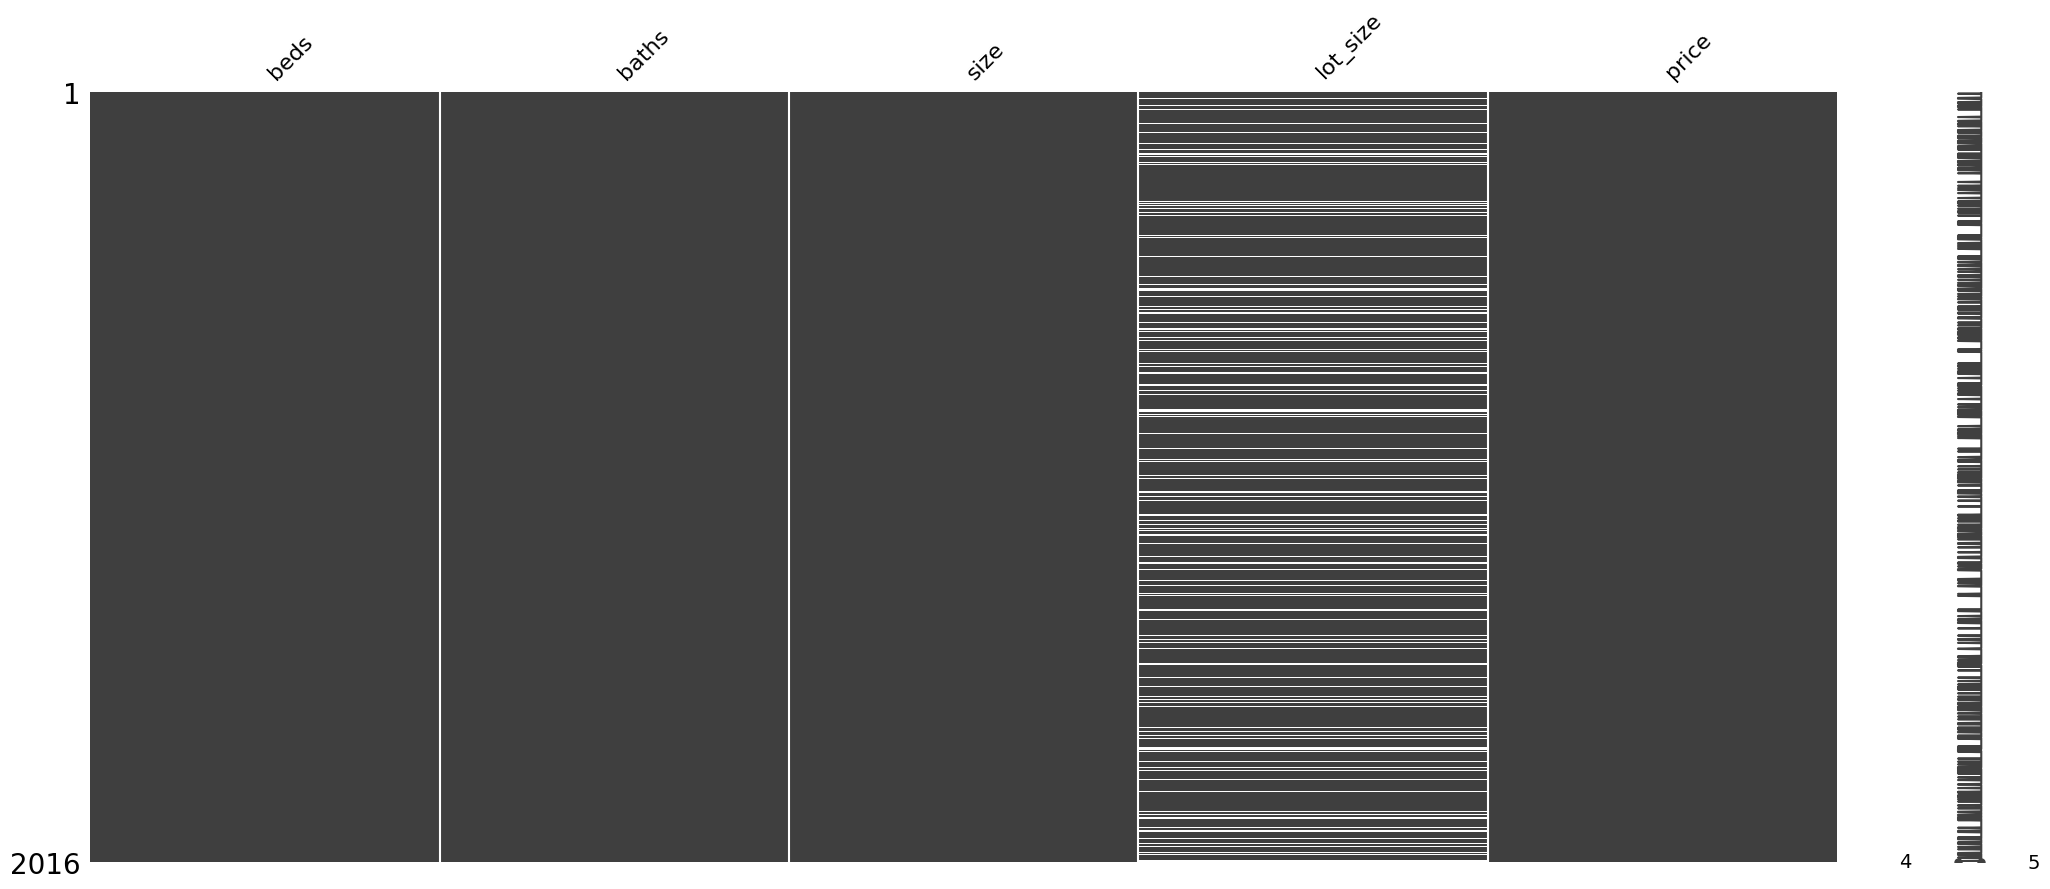

In [9]:
#Checking for Missing Values
missing_values = price.isnull().sum()
print("Missing values:\n", missing_values)
ms.matrix(price)
plt.show()

There approximately looks to be 347 missing values in the lot_size category, so let's fix that.

In [10]:
mean = price['lot_size'].mean()
median = price['lot_size'].median()

print('Mean of lot_size: ',mean)
print('Median of lot_size: ',median)

Mean of lot_size:  3871.059694427802
Median of lot_size:  4000.0


It would make the most sense if we fill in the missing values with the mean of lot_size as the median only accounts for the middle of the entire dataset after being sorted

In [11]:
price['lot_size'].fillna(price['lot_size'].mean(),inplace = True)
missing= price.isnull().sum()
print('Missing Values after Imputing',missing)

Missing Values after Imputing beds        0
baths       0
size        0
lot_size    0
price       0
dtype: int64


Cool, everything looks good now for missing values, now let's check for duplicated data.

In [12]:
# Checking duplicated records
duplicates = price.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

Number of Duplicated Entries:  9


9 duplicated entries exist....let's drop the duplicated rows

In [13]:
price = price.drop_duplicates()
duplicates = price.duplicated().sum()
print('Number of Duplicated Entries: ',duplicates)

Number of Duplicated Entries:  0


## Transformation

From the Data Understanding phase, we created box-plots to visualize each feature according to price. As we can see, many outliers exist, so let's identify them using IQR

In [14]:
def detect_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3-Q1
  lower = Q1-1.5*IQR
  upper = Q3+1.5*IQR
  return (column < lower) | (column > upper)


In [15]:
outliers_beds = detect_outliers(price['beds']).sum()
outliers_baths = detect_outliers(price['baths']).sum()
outliers_size = detect_outliers(price['size']).sum()
outliers_lot = detect_outliers(price['lot_size']).sum()
outlier_summary = {
    'Beds Outliers':outliers_beds,
    'Baths Outliers':outliers_baths,
    'Size Outliers': outliers_size,
    'Lot Size Outliers': outliers_lot
}

outlier_summary

{'Beds Outliers': 9,
 'Baths Outliers': 62,
 'Size Outliers': 40,
 'Lot Size Outliers': 0}

Outlier Analysis
- Beds: 9 outliers
- Baths: 62 outliers
- Size Outliers: 40 outliers
- Lot_Size Outliers: 0

Let's try to adjust the dataset so that there aren't many outliers

In [16]:
# Beds
Q1_beds = price['beds'].quantile(0.25)
Q3_beds = price['beds'].quantile(0.75)
IQR_beds = Q3_beds - Q1_beds
lower_beds = Q1_beds-1.5*IQR_beds
upper_beds = Q3_beds+1.5*IQR_beds

price['beds']=price['beds'].clip(lower=lower_beds,upper=upper_beds)

In [17]:
# Baths
Q1_baths = price['baths'].quantile(0.25)
Q3_baths = price['baths'].quantile(0.75)
IQR_baths = Q3_baths - Q1_baths
lower_baths = Q1_baths-1.5*IQR_baths
upper_baths = Q3_baths+1.5*IQR_baths

price['baths']=price['baths'].clip(lower=lower_baths,upper=upper_baths)

In [18]:
# Size
Q1_size = price['size'].quantile(0.25)
Q3_size = price['size'].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_size = Q1_size-1.5*IQR_size
upper_size = Q3_size+1.5*IQR_size

price['size']=price['size'].clip(lower=lower_size,upper=upper_size)

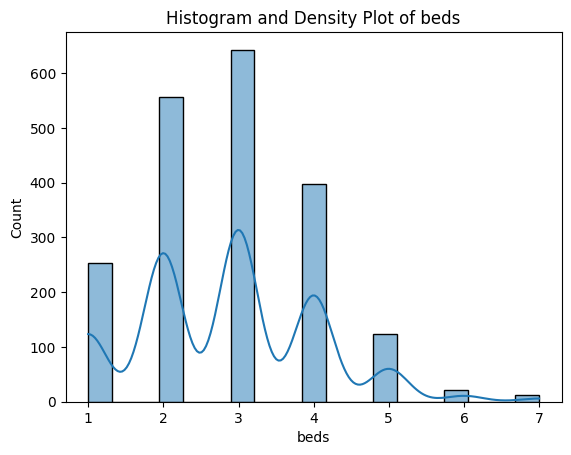

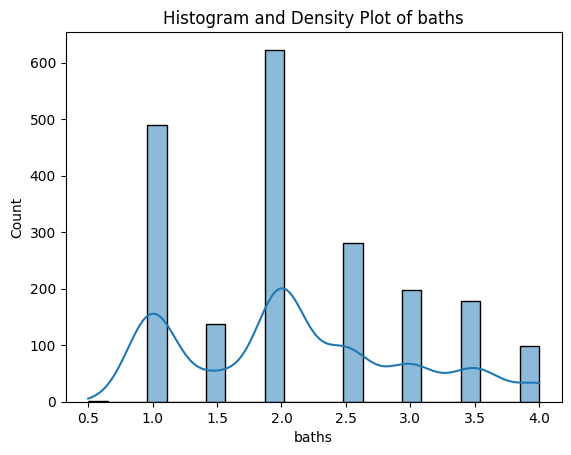

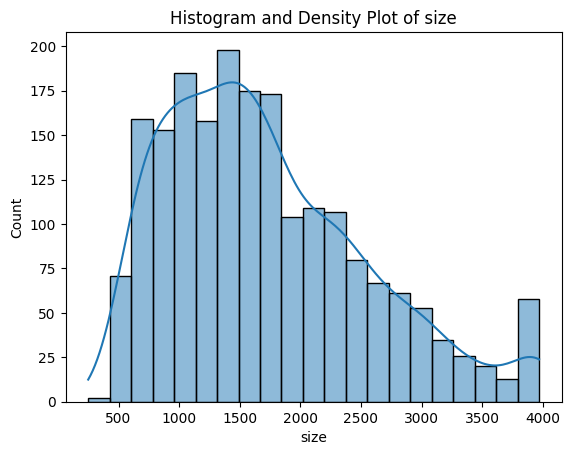

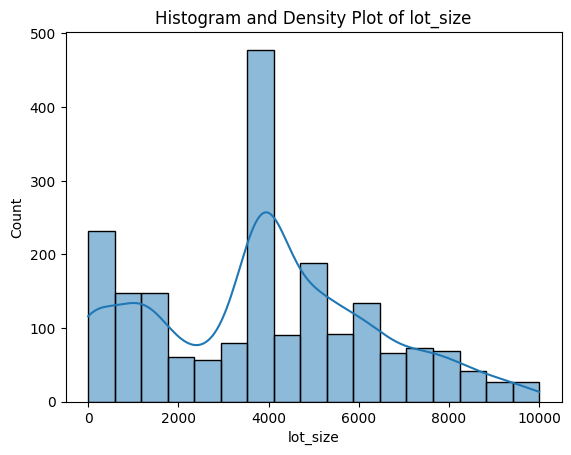

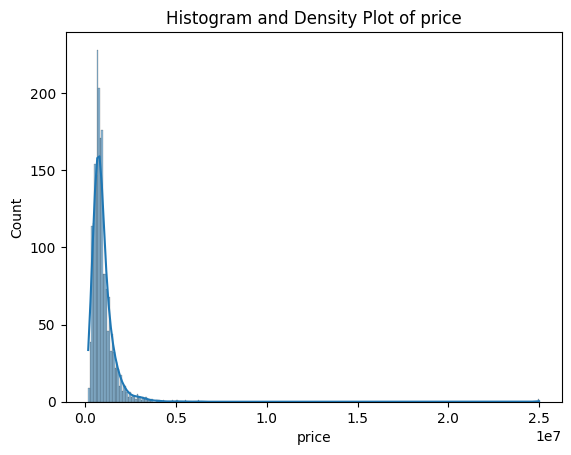

In [19]:
for col in price.select_dtypes(include=['number']).columns:
  sns.histplot(price[col],kde=True)
  plt.title(f"Histogram and Density Plot of {col}")
  plt.show()

As we can see from the histogram density plots of each variable, we no longer have outliers. Now we can start the model development phase!

# Part 3 Model Development and Evaluation

In [20]:
from sklearn.model_selection import train_test_split #Provides a function to split data into training and testing sets.
from sklearn.pipeline import Pipeline # Allows sequential application of a list of transformations and a final estimator.
from sklearn.linear_model import LinearRegression #Loads a linear regression model for predictive analysis.
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score # Imports functions to compute model metrics.
import numpy as np #Imports the NumPy library for numerical computations.
import matplotlib.pyplot as plt # Loads the matplotlib library for plotting graphs.
from sklearn.tree import DecisionTreeRegressor #create a model based on decision trees for regression tasks
from sklearn.tree import plot_tree

## Data Splitting

In [21]:
X = price.drop('price',axis=1)
y = price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LinearRegression, PolynomialRegression and DecisionTree

### LinearRegression

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [23]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("RMSE: ",rmse)
print('R^2: ',r2)

print("Coefficients of Regression: ",model.coef_)
print("Intercepts of Regression: ",model.intercept_)

RMSE:  290184.16884769243
R^2:  0.6327489925647252
Coefficients of Regression:  [-1.03708032e+05  6.23314762e+04  5.68195016e+02 -6.39932842e+00]
Intercepts of Regression:  181141.75421554246


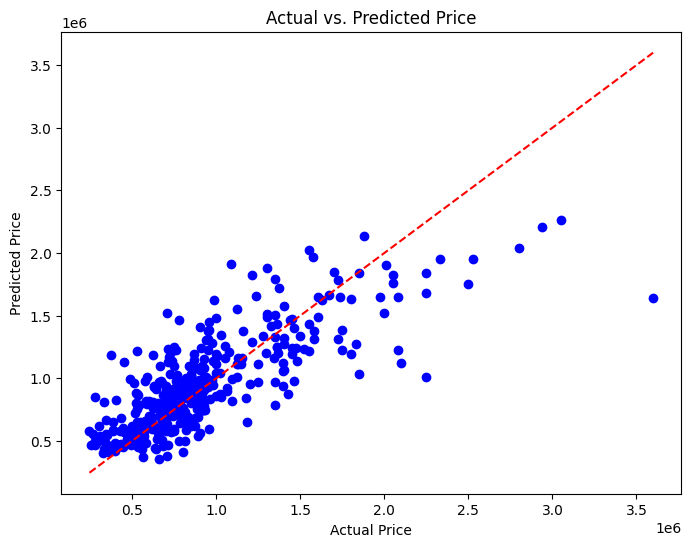

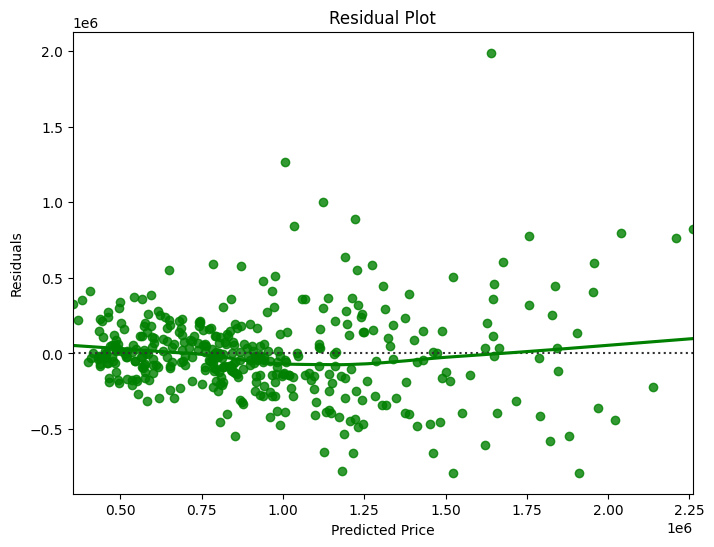

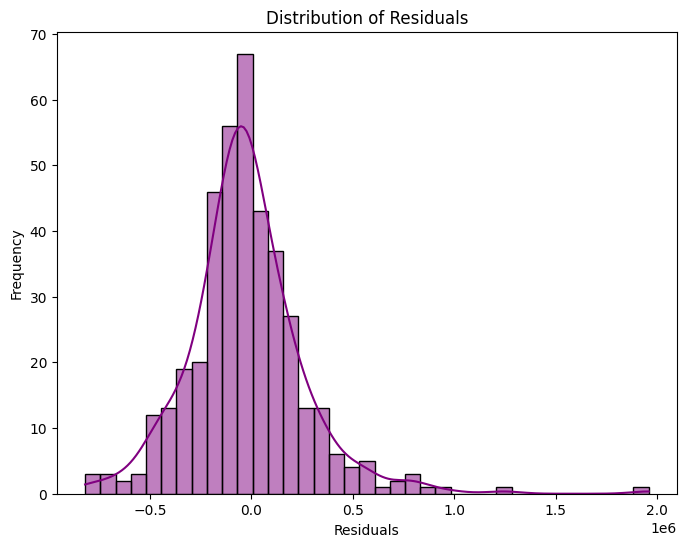

In [24]:
# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')  # Plotting the diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Distribution plot of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

### PolynomialRegression

In [25]:
numerical_features = ['beds','baths',	'size','lot_size'] #Defines a list of numerical features to be transformed.
X_numerical_train = X_train[numerical_features] #Extracts the columns for the numerical features from the training data.
X_numerical_test = X_test[numerical_features] #Extracts the same columns for the numerical features from the test data.
poly_features = PolynomialFeatures(degree=2) #Creates an instance of PolynomialFeatures to generate polynomial and
# interaction features up to the second degree
X_poly_train = poly_features.fit_transform(X_numerical_train) #Fits the PolynomialFeatures transformer to the training data
# and then transforms the training data, expanding it with polynomial features.
X_poly_test = poly_features.transform(X_numerical_test)

In [26]:
# Creates an instance of the LinearRegression model.
poly_regression_model = LinearRegression()

#  Trains the linear regression model on the transformed training data (X_poly_train),
poly_regression_model.fit(X_poly_train, y_train)

LinearRegression()

In [27]:
y_pred_poly = poly_regression_model.predict(X_poly_test)

### Calculates the Root Mean Squared Error (RMSE) between the actual target values in the test set (y_test) and
# the predicted values (y_pred_poly). RMSE quantifies the model's prediction error.
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

### Computes the R-squared (R²) score for the polynomial regression model's predictions
r2_poly = r2_score(y_test, y_pred_poly)

In [28]:
print("Polynomial Regression - RMSE:", rmse_poly, "R2:", r2_poly) # print the metrics

Polynomial Regression - RMSE: 285722.56827141094 R2: 0.6439551936515422


### DecisionTree

In [29]:
tree_model = DecisionTreeRegressor()

tree_model.fit(X_train,y_train)
y_pred = tree_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

print("RMSE: ",rmse)
print('R^2: ',r2)

RMSE:  423054.4164033803
R^2:  0.21943687452783311


# Model Comparison

### RMSE

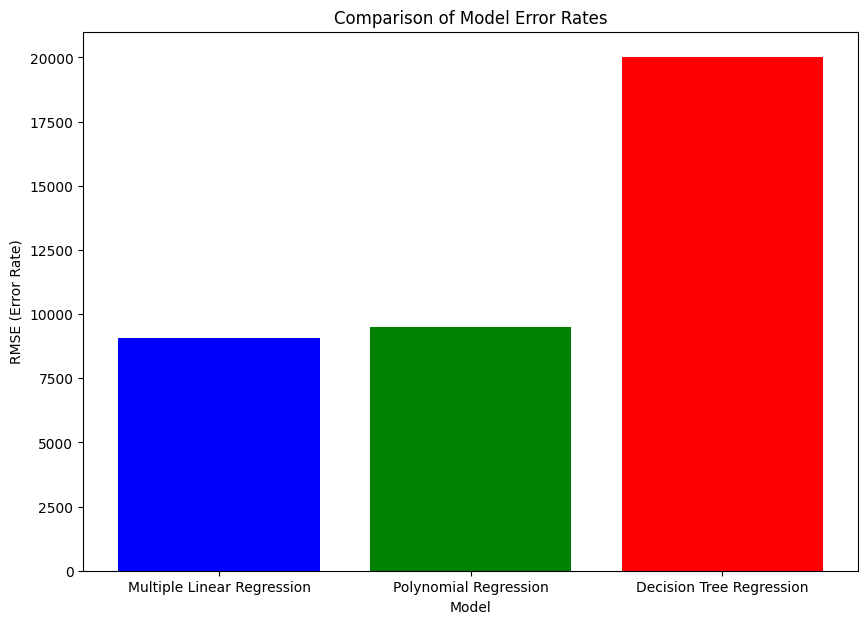

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their RMSE values
models = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression']
rmse_values = [9055.96, 9502.89, 20000.66]  # Replace these values with the actual RMSE values obtained

# Set the positions for the bars
positions = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 7))
plt.bar(positions, rmse_values, color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel('Model')
plt.ylabel('RMSE (Error Rate)')
plt.title('Comparison of Model Error Rates')
plt.xticks(positions, models)

# Show the plot
plt.show()


### R^2

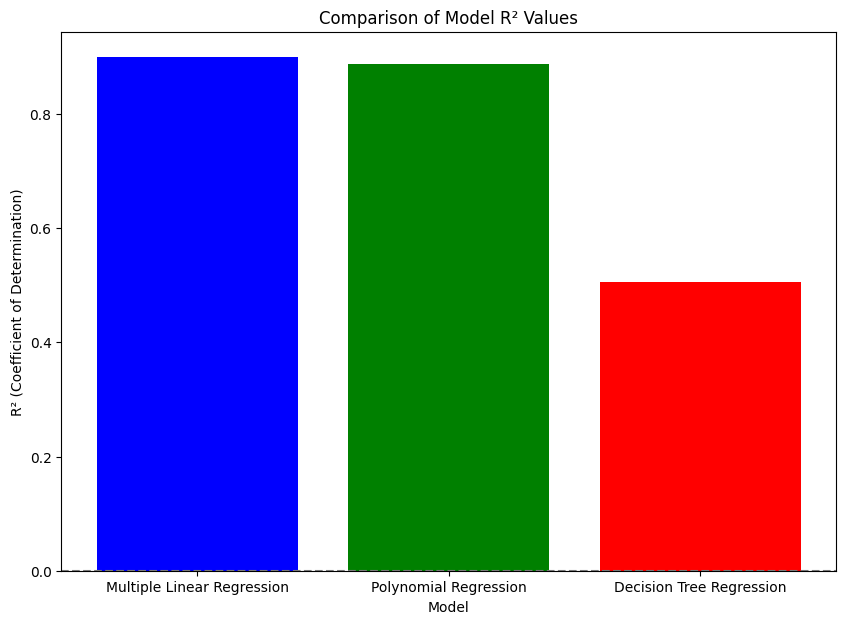

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their R² values
models = ['Multiple Linear Regression', 'Polynomial Regression', 'Decision Tree Regression']
r2_values = [0.899, 0.888, 0.506]  # Replace these values with the actual R² values obtained

# Set the positions for the bars
positions = np.arange(len(models))

# Plotting
plt.figure(figsize=(10, 7))
plt.bar(positions, r2_values, color=['blue', 'green', 'red'])

# Labels and title
plt.xlabel('Model')
plt.ylabel('R² (Coefficient of Determination)')
plt.title('Comparison of Model R² Values')
plt.xticks(positions, models)

# Adding a horizontal line for R²=0 to indicate the baseline performance
plt.axhline(y=0, color='gray', linestyle='--')

# Show the plot
plt.show()


## Results

LinearRegression Model:
- RMSE:  290184.16884769243
- R^2:  0.6327489925647252

PolynomialRegression Model:
- RMSE: 285722.56827141094
- R^2: 0.6439551936515422

DecisionTree Model:
- RMSE:  416353.14834879886
- R^2:  0.17588443727393532

If we look at the two graphs above for RMSE and R^2, we can see that there is a higher error rate if we use RMSE for Decision Trees but, when we compare it to the R^2 metrics, it does much better.

All three models have varying amounts of error but the model that does best for RMSE would be Multiple LinearRegression while the best model for R^2 would be Decision Trees